In [1]:
import vmd_contact
import _heatmap
from _heatmap import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 11, 'weight':'bold'}
matplotlib.rc('font', **font)
import os

In [2]:
peptides = ['taekdel','ligslel','cihspdl']
receptor_chain_ID = 'A'
stride = 10
rec_resids = []
lig_resids = []
def wrapper(top_pdb, traj_dcd, ligand_chain_ID, receptor_resids,lig_resids,bootstrap,frequency_threshold):
    step = vmd_contact.Frequency(top_pdb, traj_dcd, receptor_chain_ID, ligand_chain_ID, cutoff, frequency_threshold, stride,bootstrap, receptor_resids,lig_resids)
    frequency_matrix,receptor_labels,ligand_labels = step.contact_freq_vmd()
    return frequency_matrix,receptor_labels,ligand_labels
def rewrite_ligand_labels(ligand_labels):
    new_labels = []
    for l in ligand_labels:
        new_labels.append("%3d"%(int(l.split()[0])-8)+' '+l.split()[1])
    return new_labels

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


<Figure size 432x288 with 0 Axes>

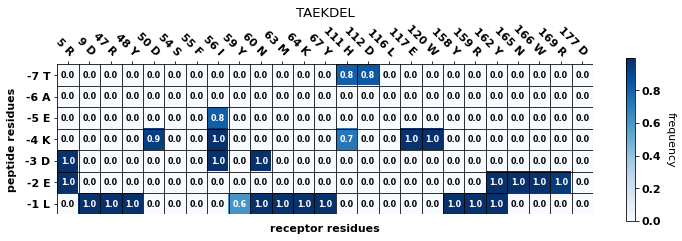

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.62s/it]


<Figure size 432x288 with 0 Axes>

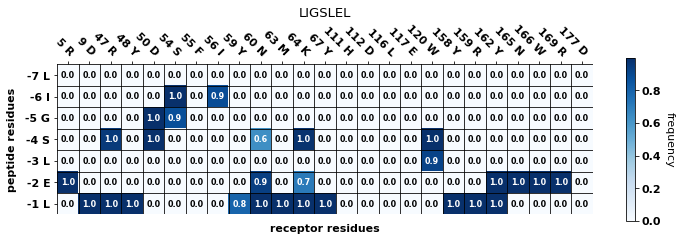

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


<Figure size 432x288 with 0 Axes>

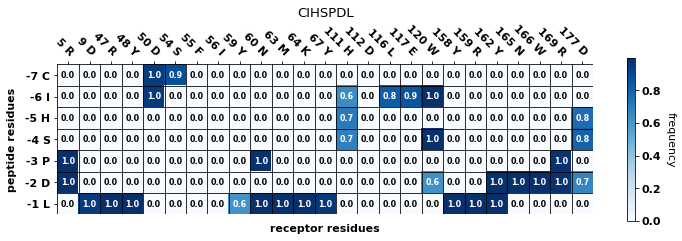

In [3]:
#rec_resids = [5,9,47,48,50,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
rec_resids = [5,9,47,48,50,54,55,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
#union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']
union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 54 S', ' 55 F',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']

bootstrap = False
cutoff = 5
frequency_threshold = 0.6
cbarlabel="frequency"

full_matrix = {}
#total_ligand_labels = {}

lig_resids = range(1,8)
for p in range(len(peptides)):
    pep = peptides[p]
    if pep =='taekdel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
    elif pep == 'ligslel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.dcd')
    else:
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
        traj_file = 'KDEL_'+pep+'_restrain.dcd'
    #pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
    #traj_file = 'KDEL_'+pep+'_restrain.dcd'
    lig_chain_ID = 'B'

    frequency_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids,bootstrap,frequency_threshold)    
    new_matrix =np.zeros((frequency_matrix.shape[1], frequency_matrix.shape[0]))
    full_matrix[pep] = frequency_matrix
    for i in range(frequency_matrix.shape[1]):
        for j in range(frequency_matrix.shape[0]):
            new_matrix[i][j]=frequency_matrix[j][i]
    new_lig_labels = rewrite_ligand_labels(ligand_labels)
    #total_ligand_labels[pep] = new_lig_labels
    if 'lig' in pep:
        new_lig_labels = [' -7 L',' -6 I', ' -5 G', ' -4 S', ' -3 L', ' -2 E', ' -1 L']
    if 'cis' in pep:
        new_lig_labels = [' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']
    if 'tae' in pep:
        new_lig_labels = [' -7 T', ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']
        #total_ligand_labels[pep] = new_lig_labels
    #print (total_ligand_labels)
    plt.clf()
    fig, ax = plt.subplots(figsize=(12,3))
    im,cbar = heatmap(new_matrix,[new_lig_labels[o] for o in range(len(new_lig_labels))], [union_xlabels[r] for r in range(len(union_xlabels))],ax=ax,cmap="Blues", cbarlabel="frequency")
    texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
    ax.set_title(pep.upper())
    plt.xlabel('receptor residues',**font)
    plt.ylabel('peptide residues',**font)
    plt.show()

# Below this cell is used for the manuscript S3 figure.

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


[' -7 T', ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']


<Figure size 432x288 with 0 Axes>

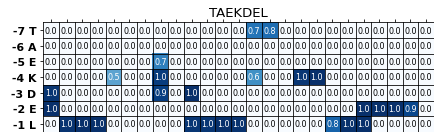

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


[' -7 L', ' -6 I', ' -5 G', ' -4 S', ' -3 L', ' -2 E', ' -1 L']


<Figure size 432x288 with 0 Axes>

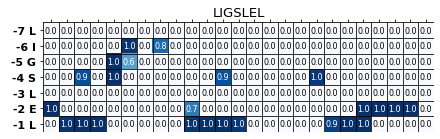

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


cihspdl
[' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']
[' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']


<Figure size 432x288 with 0 Axes>

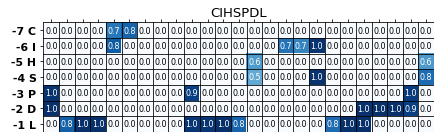

{'  5 R': 0.006, '  9 D': -0.002, ' 47 R': 0.0, ' 48 Y': 0.0, ' 50 D': -0.4531, ' 54 S': -0.98, ' 55 F': 0.0, ' 56 I': 0.1737, ' 59 Y': 0.0, ' 60 N': 0.02, ' 63 M': -0.022, ' 64 K': -0.004, ' 67 Y': 0.018, '111 H': 0.7325, '112 D': 0.7605, '116 L': 0.0, '117 E': 0.9741, '120 W': 0.0299, '158 Y': -0.1317, '159 R': -0.004, '162 Y': 0.0, '165 N': 0.0, '166 W': 0.0, '169 R': -0.0878, '177 D': 0.0}


In [8]:
import _heatmap_no_bar
from _heatmap_no_bar import *

#rec_resids = [5,9,47,48,50,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
rec_resids = [5,9,47,48,50,54,55,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
#union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']
union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 54 S', ' 55 F',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']

bootstrap = False
frequency_threshold = 0.5
cbarlabel="frequency"
cutoff = 4.5

full_matrix = {}

lig_resids = range(1,8)
for p in range(len(peptides)):
    pep = peptides[p]
    if pep =='taekdel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
    elif pep == 'ligslel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.dcd')
    else:
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
        traj_file = 'KDEL_'+pep+'_restrain.dcd'
    #pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
    #traj_file = 'KDEL_'+pep+'_restrain.dcd'
    lig_chain_ID = 'B'

    frequency_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids,bootstrap,frequency_threshold)    
    new_matrix =np.zeros((frequency_matrix.shape[1], frequency_matrix.shape[0]))
    full_matrix[pep] = frequency_matrix
    for i in range(frequency_matrix.shape[1]):
        for j in range(frequency_matrix.shape[0]):
            new_matrix[i][j]=frequency_matrix[j][i]
    new_lig_labels = rewrite_ligand_labels(ligand_labels)
    #total_ligand_labels[pep] = new_lig_labels
    if 'lig' in pep:
        new_lig_labels = [' -7 L',' -6 I', ' -5 G', ' -4 S', ' -3 L', ' -2 E', ' -1 L']
    if 'cih' in pep:
        print (pep)
        new_lig_labels = [' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']
        print (new_lig_labels)
    if 'tae' in pep:
        new_lig_labels = [' -7 T', ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']
        #total_ligand_labels[pep] = new_lig_labels
    print (new_lig_labels)
    plt.clf()
    fig, ax = plt.subplots(figsize=(7,3))
    #if pep =='taekdel':
    #    im,cbar = heatmap(new_matrix,[new_lig_labels[o] for o in range(len(new_lig_labels))], [union_xlabels[r] for r in range(len(union_xlabels))],ax=ax,cmap="Blues", cbarlabel="frequency")
    #else:
    im,cbar = heatmap(new_matrix,[new_lig_labels[o] for o in range(len(new_lig_labels))] , ['' for r in range(len(union_xlabels))],ax=ax,cmap="Blues", cbarlabel="frequency")
    texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8, fontweight='normal')
    ax.set_title(pep.upper())
    #plt.xlabel('receptor residues',**font)
    #plt.ylabel('peptide residues',**font)
    plt.savefig('/home/bxie/manu_'+pep+'.png', dpi = 1000)
    plt.show()

    
diff_ig = {}
diff_ih = {}
for_table_list = []

def convert_7to1(matrix):
    contact1d = []
    for i in range(len(matrix)):
        tem = np.max(matrix[i])
        contact1d.append(tem)
    return contact1d

for_table_list.append(['Residues','AEKDEL cont freq','LIGSLEL cont freq', 'CIHSPDL cont freq','AEKDEL-LIGSLEL','AEKDEL-CIHSPDL'])
for i in range(len(union_xlabels)):
    aekdel_matrix = convert_7to1(full_matrix['taekdel'])
    igslel_matrix = convert_7to1(full_matrix['ligslel'])
    cihspdl_matrix = convert_7to1(full_matrix['cihspdl'])
    
    diff_ig[union_xlabels[i]] = round(aekdel_matrix[i]- igslel_matrix[i],4)
    diff_ih[union_xlabels[i]] = round(aekdel_matrix[i] - cihspdl_matrix[i],4)
    for_table_list.append([union_xlabels[i],round(aekdel_matrix[i],4),round(igslel_matrix[i],4), round(cihspdl_matrix[i],4), diff_ig[union_xlabels[i]], diff_ih[union_xlabels[i]]])
print (diff_ig)

#from IPython.display import HTML, display
#display(HTML(
#   '<table><tr>{}</tr></table>'.format(
#       '</tr><tr>'.join(
#           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in for_table_list)
#       )
#))

In [5]:
for_table_list = []
for_table_list.append(['Residues','AEKDEL cont freq','LIGSLEL cont freq', 'CIHSPDL cont freq','AEKDEL-LIGSLEL','AEKDEL-CIHSPDL'])
for i in range(len(union_xlabels)):
    aekdel_matrix = convert_7to1(full_matrix['taekdel'])
    igslel_matrix = convert_7to1(full_matrix['ligslel'])
    cihspdl_matrix = convert_7to1(full_matrix['cihspdl'])
    new_aekdel = []
    new_igslel = []
    new_cihspdl = []
    new_select_index = []
    for j in range(len(aekdel_matrix)):
        if aekdel_matrix[j]>0.5 or igslel_matrix[j]>0.5 or cihspdl_matrix[j]>0.5: # frequency : 50% 
            new_aekdel.append(aekdel_matrix[j])
            new_igslel.append(igslel_matrix[j])
            new_cihspdl.append(cihspdl_matrix[j])
            new_select_index.append(j)
for ni in range(len(new_select_index)):
    n = new_select_index[ni]
    diff_ig[union_xlabels[n]] = round(new_aekdel[ni]- new_igslel[ni],2)
    diff_ih[union_xlabels[n]] = round(new_aekdel[ni] - new_cihspdl[ni],2)
    for_table_list.append([union_xlabels[n],round(new_aekdel[ni],2),round(new_igslel[ni],2), round(new_cihspdl[ni],2), diff_ig[union_xlabels[n]], diff_ih[union_xlabels[n]]])

from IPython.display import HTML, display
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in for_table_list)
       )
))


import csv
with open('/home/bxie/table.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, dialect='excel')
    for tableline in for_table_list:
        spamwriter.writerow(tableline)

    

Residues,AEKDEL cont freq,LIGSLEL cont freq,CIHSPDL cont freq,AEKDEL-LIGSLEL,AEKDEL-CIHSPDL
5 R,1.0,0.99,1.0,0.01,0.0
9 D,0.98,0.98,0.81,-0.0,0.17
47 R,1.0,1.0,1.0,0.0,0.0
48 Y,1.0,1.0,1.0,0.0,0.0
50 D,0.54,1.0,0.83,-0.45,-0.29
54 S,0.0,0.98,0.8,-0.98,-0.8
56 I,0.95,0.78,0.0,0.17,0.95
60 N,1.0,0.98,0.97,0.02,0.02
63 M,0.97,1.0,0.97,-0.02,0.0
64 K,0.99,1.0,1.0,-0.0,-0.0


  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.62s/it]


[' -7 T', ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']


<Figure size 432x288 with 0 Axes>

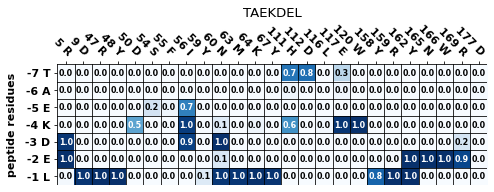

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


[' -7 L', ' -6 I', ' -5 G', ' -4 S', ' -3 L', ' -2 E', ' -1 L']


<Figure size 432x288 with 0 Axes>

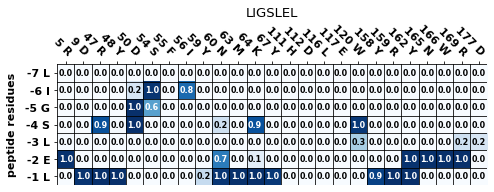

  0%|          | 0/25 [00:00<?, ?it/s]

range 5 to 177 residues are used for calculating contact frequency.


100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


cihspdl
[' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']
[' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']


<Figure size 432x288 with 0 Axes>

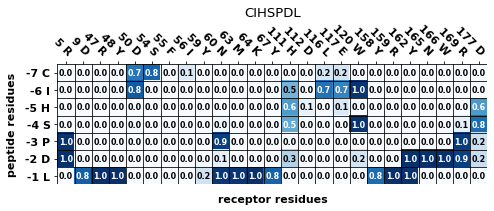

In [6]:
import _heatmap_no_bar
from _heatmap_no_bar import *

#rec_resids = [5,9,47,48,50,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
rec_resids = [5,9,47,48,50,54,55,56,59,60,63,64,67,111,112,116,117,120,158,159,162,165,166,169,177]
#union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']
union_xlabels = ['  5 R','  9 D',' 47 R',' 48 Y',' 50 D',' 54 S', ' 55 F',' 56 I',' 59 Y',' 60 N',' 63 M',' 64 K',' 67 Y','111 H','112 D','116 L','117 E','120 W','158 Y','159 R','162 Y','165 N','166 W','169 R','177 D']

bootstrap = False
frequency_threshold = 0.0
cbarlabel="frequency"
cutoff = 4.5

full_matrix = {}

lig_resids = range(1,8)
for p in range(len(peptides)):
    pep = peptides[p]
    if pep =='taekdel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/TAEKDEL_new/TAEKDEL_new.dcd')
    elif pep == 'ligslel':
        pdb_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.pdb')
        traj_file = os.path.join('/home/bxie/PycharmProjects/KDEL/kdel_simulation/LIGSLEL_new/LIGSLEL_new.dcd')
    else:
        pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
        traj_file = 'KDEL_'+pep+'_restrain.dcd'
    #pdb_file = 'KDEL_'+pep+'_restrain_Resi4.pdb' # single residue
    #traj_file = 'KDEL_'+pep+'_restrain.dcd'
    lig_chain_ID = 'B'

    frequency_matrix,receptor_labels,ligand_labels = wrapper(pdb_file, traj_file, lig_chain_ID, rec_resids,lig_resids,bootstrap,frequency_threshold)    
    new_matrix =np.zeros((frequency_matrix.shape[1], frequency_matrix.shape[0]))
    full_matrix[pep] = frequency_matrix
    for i in range(frequency_matrix.shape[1]):
        for j in range(frequency_matrix.shape[0]):
            new_matrix[i][j]=frequency_matrix[j][i]
    new_lig_labels = rewrite_ligand_labels(ligand_labels)
    #total_ligand_labels[pep] = new_lig_labels
    if 'lig' in pep:
        new_lig_labels = [' -7 L',' -6 I', ' -5 G', ' -4 S', ' -3 L', ' -2 E', ' -1 L']
    if 'cih' in pep:
        print (pep)
        new_lig_labels = [' -7 C', ' -6 I', ' -5 H', ' -4 S', ' -3 P', ' -2 D', ' -1 L']
        print (new_lig_labels)
    if 'tae' in pep:
        new_lig_labels = [' -7 T', ' -6 A', ' -5 E', ' -4 K', ' -3 D', ' -2 E', ' -1 L']
        #total_ligand_labels[pep] = new_lig_labels
    print (new_lig_labels)
    plt.clf()
    
    if 'ci' in pep:
        fig, ax = plt.subplots(figsize=(7,3))
    else:
        fig, ax = plt.subplots(figsize=(7,3))

    im,cbar = _heatmap_no_bar.heatmap(new_matrix,[new_lig_labels[o] for o in range(len(new_lig_labels))], [union_xlabels[r] for r in range(len(union_xlabels))],ax=ax,cmap="Blues", vmin=0.0, vmax = 1, cbarlabel="frequency")
    texts = _heatmap_no_bar.annotate_heatmap(im, valfmt="{x:.1f}", size=8)
    ax.set_title(pep.upper())        
    plt.ylabel('peptide residues',**font)
    plt.tight_layout()
    if 'ci' in pep:
        plt.xlabel('receptor residues',**font)

    #plt.savefig('/home/bxie/'+pep+'_nobar.png')
    plt.show()


In [7]:
for_table_list = []
for_table_list.append(['Residues','AEKDEL cont freq','LIGSLEL cont freq', 'CIHSPDL cont freq','AEKDEL-LIGSLEL','AEKDEL-CIHSPDL'])
for i in range(len(union_xlabels)):
    aekdel_matrix = convert_7to1(full_matrix['taekdel'])
    igslel_matrix = convert_7to1(full_matrix['ligslel'])
    cihspdl_matrix = convert_7to1(full_matrix['cihspdl'])
    new_aekdel = []
    new_igslel = []
    new_cihspdl = []
    new_select_index = []
    for j in range(len(aekdel_matrix)):
        if aekdel_matrix[j]>0.5 or igslel_matrix[j]>0.5 or cihspdl_matrix[j]>0.5: # frequency : 50% 
            new_aekdel.append(aekdel_matrix[j])
            new_igslel.append(igslel_matrix[j])
            new_cihspdl.append(cihspdl_matrix[j])
            new_select_index.append(j)
for ni in range(len(new_select_index)):
    n = new_select_index[ni]
    diff_ig[union_xlabels[n]] = round(new_aekdel[ni]- new_igslel[ni],2)
    diff_ih[union_xlabels[n]] = round(new_aekdel[ni] - new_cihspdl[ni],2)
    for_table_list.append([union_xlabels[n],round(new_aekdel[ni],2),round(new_igslel[ni],2), round(new_cihspdl[ni],2), diff_ig[union_xlabels[n]], diff_ih[union_xlabels[n]]])

from IPython.display import HTML, display
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in for_table_list)
       )
))


import csv
with open('/home/bxie/table.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, dialect='excel')
    for tableline in for_table_list:
        spamwriter.writerow(tableline)


Residues,AEKDEL cont freq,LIGSLEL cont freq,CIHSPDL cont freq,AEKDEL-LIGSLEL,AEKDEL-CIHSPDL
5 R,1.0,0.99,1.0,0.01,0.0
9 D,0.98,0.98,0.81,-0.0,0.17
47 R,1.0,1.0,1.0,0.0,0.0
48 Y,1.0,1.0,1.0,0.0,0.0
50 D,0.54,1.0,0.83,-0.45,-0.29
54 S,0.18,0.98,0.8,-0.8,-0.62
56 I,0.95,0.78,0.13,0.17,0.82
60 N,1.0,0.98,0.97,0.02,0.02
63 M,0.97,1.0,0.97,-0.02,0.0
64 K,0.99,1.0,1.0,-0.0,-0.0
